# European and International Music Festivals 2024

- Festival_Name: The official name of the music festival.
- Location: The city where the festival is held.
- Country : The country where the festival is held.
- Attendance_Numbers: The estimated number of attendees at the festival.
- Age_Range : The age range of the attendees.
- Visitor_Demographics: The interests of the attendees.
- Economic_Impact: The estimated economic impact of the festival, often presented in local currency.
- Music_Genre: The primary genre or genres of music featured at the festival.

In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv(r'C:\Users\elisa\Downloads\Data Analyst\Projet 3\data_music_festival.csv')
df.head()

,,Festival_Name,Location,Attendance_Numbers,Visitor_Demographics,Economic_Impact,Music_Genre
Glastonbury Festival,Somerset,UK,200000,18-35,Music Enthusiasts,£100 million,Various
Tomorrowland,Boom,Belgium,400000,18-30,EDM Fans,€150 million,EDM
Sziget Festival,Budapest,Hungary,500000,18-40,International Attendees,€130 million,Various
Rock am Ring,Nürburg,Germany,90000,20-40,Rock Fans,€80 million,Rock
Roskilde Festival,Roskilde,Denmark,130000,18-40,Alternative Music Lovers,DKK 70 million,Alternative


# === Traitement des données ===

In [15]:

def load_festival_data(filepath):
    """
    Charge un fichier CSV, réinitialise l'index et ajoute une colonne Year avec la valeur 2024.
    
    :param filepath: Chemin du fichier CSV
    :return: DataFrame chargé
    """
    df = pd.read_csv(filepath)
    df.reset_index(inplace=True)
    df.columns = ['Festival_Name', 'Location', 'Country', 'Attendance_Numbers', 'Age_Range',
                  'Visitor_Demographics', 'Economic_Impact', 'Music_Genre']
    df["Year"] = 2024
    return df


def clean_text_columns(df):
    """
    Supprime les espaces en début et fin de texte pour toutes les colonnes de type 'object'.
    
    :param df: DataFrame
    :return: DataFrame nettoyé
    """
    return df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


def clean_economic_impact(value):
    """
    Nettoie et convertit la colonne Economic_Impact en USD équivalent.
    
    :param value: Valeur de l'impact économique sous forme de chaîne
    :return: Valeur convertie en USD
    """
    if pd.isna(value):
        return np.nan
    
    value = value.replace(",", "").strip()
    numeric_value = ''.join(filter(lambda x: x.isdigit() or x == '.', value))
    if not numeric_value:
        return np.nan
    numeric_value = float(numeric_value)
    
    if 'million' in value.lower():
        numeric_value *= 1_000_000
    elif 'billion' in value.lower():
        numeric_value *= 1_000_000_000
    elif 'trillion' in value.lower():
        numeric_value *= 1_000_000_000_000
    
    currency_conversion = {
        '£': 1.26, '€': 1.09, 'USD': 1.0, 'DKK': 0.14, 'AU$': 0.66,
        'CHF': 1.14, 'MXN': 0.054, 'PLN': 0.25, 'SEK': 0.10, 'CAD': 0.74,
        'NOK': 0.10, 'JPY': 0.0074, 'CLP': 0.0013, 'ARS': 0.0098, 'BRL': 0.21,
        'NGN': 0.0026, 'INR': 0.014, 'RUB': 0.015, 'CNY': 0.17, 'KRW': 0.00072
    }
    
    for currency, rate in currency_conversion.items():
        if currency in value:
            return numeric_value * rate
    
    return np.nan


def standardize_age_ranges(age_range):
    """
    Regroupe les tranches d'âge en catégories standards en détectant automatiquement les limites numériques.
    
    :param age_range: Tranche d'âge originale (ex. '18-35')
    :return: Tranche d'âge standardisée
    """
    import re

    # Extraire les âges numériques de la chaîne (par ex., '18-35' → [18, 35])
    matches = re.findall(r'\d+', age_range)
    if len(matches) == 2:
        min_age, max_age = map(int, matches)
        avg_age = (min_age + max_age) / 2  # Moyenne pour attribuer une catégorie
        
        # Catégorisation basée sur l'âge moyen
        if avg_age <= 24:
            return "18-24"
        elif 25 <= avg_age <= 34:
            return "25-34"
        elif 35 <= avg_age <= 44:
            return "35-44"
        elif 45 <= avg_age <= 54:
            return "45-54"
        elif 55 <= avg_age <= 64:
            return "55-64"
        else:
            return "65+"
    else:
        # Si la tranche d'âge est mal formatée ou inconnue
        return "Inconnu"
    

def add_coordinates_country(df):
    """
    Ajoute les colonnes Latitude et Longitude au DataFrame en fonction du pays.
    
    :param df: DataFrame contenant une colonne 'Country'
    :return: DataFrame avec les colonnes supplémentaires 'Latitude' et 'Longitude'
    """
    # Dictionnaire des coordonnées géographiques par pays
    country_coordinates = {
        'UK': (55.3781, -3.4360),
        'Belgium': (50.5039, 4.4699),
        'Hungary': (47.1625, 19.5033),
        'Germany': (51.1657, 10.4515),
        'Denmark': (56.2639, 9.5018),
        'France': (46.6034, 1.8883),
        'Spain': (40.4637, -3.7492),
        'Serbia': (44.0165, 21.0059),
        'Netherlands': (52.1326, 5.2913),
        'Australia': (-25.2744, 133.7751),
        'Switzerland': (46.8182, 8.2275),
        'Uganda': (1.3733, 32.2903),
        'USA': (37.0902, -95.7129),
        'Poland': (51.9194, 19.1451),
        'Greece': (39.0742, 21.8243),
        'Finland': (61.9241, 25.7482),
        'Mexico': (23.6345, -102.5528),
        'Sweden': (60.1282, 18.6435),
        'Romania': (45.9432, 24.9668),
        'Canada': (56.1304, -106.3468),
        'Italy': (41.8719, 12.5674),
        'Norway': (60.4720, 8.4689),
        'Montenegro': (42.7087, 19.3744),
        'Japan': (36.2048, 138.2529),
        'Chile': (-35.6751, -71.5430),
        'Ireland': (53.1424, -7.6921),
        'Argentina': (-38.4161, -63.6167)
    }
    
    # Ajouter les colonnes Latitude et Longitude des pays à partir du dictionnaire
    df['Latitude_country'] = df['Country'].map(lambda x: country_coordinates.get(x, (None, None))[0])
    df['Longitude_country'] = df['Country'].map(lambda x: country_coordinates.get(x, (None, None))[1])
    
    return df


def add_coordinates_location(df):
    """
    Ajoute les colonnes Latitude et Longitude au DataFrame en fonction  de la ville.
    
    :param df: DataFrame contenant une colonne 'Country' et 'Location'
    :return: DataFrame avec les colonnes supplémentaires 'Latitude_Location', 'Longitude_Location'
    """
    # Dictionnaire des coordonnées géographiques par ville
    location_coordinates = {
        'Somerset': (51.2093, -2.6453),
        'Boom': (51.0913, 4.3717),
        'Budapest': (47.4979, 19.0402),
        'Nürburg': (50.3345, 6.9470),
        'Roskilde': (55.6419, 12.0878),
        'Reading': (51.4543, -0.9781),
        'Paris': (48.8566, 2.3522),
        'Benicàssim': (40.0470, 0.0483),
        'Novi Sad': (45.2671, 19.8335),
        'Barcelona': (41.3851, 2.1734),
        'Berlin': (52.5200, 13.4050),
        'Hasselt': (50.9311, 5.3378),
        'Burriana': (39.8897, -0.0851),
        'Dour': (50.3956, 3.7758),
        'Werchter': (50.9671, 4.7002),
        'Wacken': (54.0222, 9.3766),
        'Strathallan Castle': (56.2855, -3.6886),
        'Haarlem': (52.3874, 4.6462),
        'Kendal': (54.3268, -2.7476),
        'Suffolk': (52.1872, 0.9708),
        'Shepton Mallet': (51.1894, -2.5472),
        'Brecon Beacons': (51.8833, -3.4360),
        'Feucht': (49.3760, 11.2174),
        'Manchester': (53.4808, -2.2426),
        'London': (51.5074, -0.1278),
        'Bendigo': (-36.7570, 144.2794),
        'Cheshire': (53.2326, -2.6103),
        'Montreux': (46.4312, 6.9107),
        'Jinja': (0.4244, 33.2040),
        'Valencia': (39.4699, -0.3763),
        'Park City': (40.6461, -111.4970),
        'Madrid': (40.4168, -3.7038),
        'Gdynia': (54.5189, 18.5305),
        'Bern': (46.9481, 7.4474),
        'Athens': (37.9838, 23.7275),
        'Turku': (60.4518, 22.2666),
        'Großpösna': (51.2651, 12.4892),
        'Winchester': (51.0632, -1.3080),
        'Indio': (33.7206, -116.2156),
        'Mexico City': (19.4326, -99.1332),
        'Black Rock City': (40.7864, -119.2065),
        'Newport': (41.4901, -71.3128),
        'Leeds': (53.8008, -1.5491),
        'Munich': (48.1351, 11.5820),
        'Gothenburg': (57.7089, 11.9746),
        'Garz': (54.3391, 13.3637),
        'Cluj-Napoca': (46.7712, 23.6236),
        'Brighton': (50.8225, -0.1372),
        'Montreal': (45.5017, -73.5673),
        'Isle of Wight': (50.6938, -1.3047),
        'Florence': (43.7696, 11.2558),
        'Amsterdam': (52.3676, 4.9041),
        'Miami': (25.7617, -80.1918),
        'Oslo': (59.9139, 10.7522),
        'Budva': (42.2866, 18.8419),
        'San Cristóbal de La Laguna': (28.4853, -16.3201),
        'Kahului': (20.8895, -156.4743),
        'Brussels': (50.8503, 4.3517),
        'Tokyo': (35.6895, 139.6917),
        'Logroño': (42.4627, -2.4440),
        'Hove': (50.8358, -0.1733),
        'Glasgow': (55.8642, -4.2518),
        'Santiago': (-33.4489, -70.6693),
        'Bergen': (60.3913, 5.3221),
        'Stradbally': (53.0098, -7.1513),
        'Lucerne': (47.0502, 8.3093),
        'Buenos Aires': (-34.6037, -58.3816)
    }
    
    # Ajouter les colonnes Latitude et Longitude des pays à partir du dictionnaire
    df['Latitude_Location'] = df['Location'].map(lambda x: location_coordinates.get(x, (None, None))[0])
    df['Longitude_Location'] = df['Location'].map(lambda x: location_coordinates.get(x, (None, None))[1])

    return df

def add_flag_urls(df):
    """
    Ajoute une colonne 'Flag_URL' avec l'URL des drapeaux des pays en utilisant flagcdn.com
    
    :param df: DataFrame contenant une colonne 'Country'
    :return: DataFrame avec une nouvelle colonne 'Flag_URL'
    """
    # Dictionnaire des codes pays (ISO Alpha-2) pour correspondre aux drapeaux
    country_code_mapping = {
        'UK': 'gb', 'Belgium': 'be', 'Hungary': 'hu', 'Germany': 'de', 'Denmark': 'dk',
        'France': 'fr', 'Spain': 'es', 'Serbia': 'rs', 'Netherlands': 'nl', 'Australia': 'au',
        'Switzerland': 'ch', 'Uganda': 'ug', 'USA': 'us', 'Poland': 'pl', 'Greece': 'gr',
        'Finland': 'fi', 'Mexico': 'mx', 'Sweden': 'se', 'Romania': 'ro', 'Canada': 'ca',
        'Italy': 'it', 'Norway': 'no', 'Montenegro': 'me', 'Japan': 'jp', 'Chile': 'cl',
        'Ireland': 'ie', 'Argentina': 'ar'
    }
    
    # Ajouter la colonne Flag_URL en fonction du pays
    df['Flag_URL'] = df['Country'].map(lambda x: f"https://flagcdn.com/w320/{country_code_mapping.get(x, 'xx')}.png")

    return df


def process_festival_data(filepath):
    """
    Charge, nettoie et transforme les données du festival.
    
    :param filepath: Chemin du fichier CSV
    :return: DataFrame traité
    """
    df = load_festival_data(filepath)                                                                   # Charger les données
    df = clean_text_columns(df)                                                                         # Nettoyer les colonnes texte
    df['Economic_Impact_USD'] = df['Economic_Impact'].apply(clean_economic_impact)                      # Nettoyer Economic_Impact
    df['Age_Category'] = df['Age_Range'].apply(standardize_age_ranges)                                  # Standardiser les tranches d'âge
    df = add_coordinates_country(df)                                                                    # Ajouter les colonnes Latitude et Longitude poour les pays
    df = add_coordinates_location(df)                                                                   # Ajouter les colonnes Latitude et Longitude pour les villes
    df = add_flag_urls(df)                                                                              # Ajoute la colonne des drapeaux
    df['Economic_Impact_USD'] = df['Economic_Impact_USD'].fillna(df['Economic_Impact_USD'].median())    # Remplacer les valeurs manquantes par la médiane
    df.drop_duplicates(inplace=True)                                                                    # Supprimer les doublons

    
    # Sélectionner les colonnes pertinentes
    selected_columns = [
        "Festival_Name", "Location", "Latitude_Location", "Longitude_Location", "Country", "Latitude_country", "Longitude_country", "Year", "Attendance_Numbers", 
        "Age_Category", "Visitor_Demographics", "Economic_Impact", "Economic_Impact_USD", 
        "Music_Genre", "Flag_URL"
    ]
    df = df[selected_columns]
    
    return df

# Exemple d'utilisation
filepath = r'C:\Users\elisa\Downloads\Data Analyst\Projet 3\data_music_festival.csv'
df_filtered = process_festival_data(filepath)

# Enregistrer les données de copie dans un nouveau fichier csv 
df_filtered.to_csv('data_music_festival_cleaned_with_flags.csv')

df_filtered.head()


,Festival_Name,Location,Latitude_Location,Longitude_Location,Country,Latitude_country,Longitude_country,Year,Attendance_Numbers,Age_Category,Visitor_Demographics,Economic_Impact,Economic_Impact_USD,Music_Genre,Flag_URL
0,Glastonbury Festival,Somerset,51.2093,-2.6453,UK,55.3781,-3.4360,2024,200000,25-34,Music Enthusiasts,£100 million,126000000.0,Various,https://flagcdn.com/w320/gb.png
1,Tomorrowland,Boom,51.0913,4.3717,Belgium,50.5039,4.4699,2024,400000,18-24,EDM Fans,€150 million,163500000.0,EDM,https://flagcdn.com/w320/be.png
2,Sziget Festival,Budapest,47.4979,19.0402,Hungary,47.1625,19.5033,2024,500000,25-34,International Attendees,€130 million,141700000.0,Various,https://flagcdn.com/w320/hu.png
3,Rock am Ring,Nürburg,50.3345,6.9470,Germany,51.1657,10.4515,2024,90000,25-34,Rock Fans,€80 million,87200000.0,Rock,https://flagcdn.com/w320/de.png
4,Roskilde Festival,Roskilde,55.6419,12.0878,Denmark,56.2639,9.5018,2024,130000,25-34,Alternative Music Lovers,DKK 70 million,9800000.0,Alternative,https://flagcdn.com/w320/dk.png


In [16]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Festival_Name         79 non-null     object 
 1   Location              79 non-null     object 
 2   Latitude_Location     79 non-null     float64
 3   Longitude_Location    79 non-null     float64
 4   Country               79 non-null     object 
 5   Latitude_country      79 non-null     float64
 6   Longitude_country     79 non-null     float64
 7   Year                  79 non-null     int64  
 8   Attendance_Numbers    79 non-null     int64  
 9   Age_Category          79 non-null     object 
 10  Visitor_Demographics  79 non-null     object 
 11  Economic_Impact       79 non-null     object 
 12  Economic_Impact_USD   79 non-null     float64
 13  Music_Genre           79 non-null     object 
 14  Flag_URL              79 non-null     object 
dtypes: float64(5), int64(2), objec

In [17]:
df_filtered.isnull().sum()

Festival_Name           0
Location                0
Latitude_Location       0
Longitude_Location      0
Country                 0
Latitude_country        0
Longitude_country       0
Year                    0
Attendance_Numbers      0
Age_Category            0
Visitor_Demographics    0
Economic_Impact         0
Economic_Impact_USD     0
Music_Genre             0
Flag_URL                0
dtype: int64

In [18]:
list(df_filtered['Age_Category'].unique())

['25-34', '18-24', '45-54', '35-44']

In [19]:
list(df_filtered['Country'].unique())

['UK',
 'Belgium',
 'Hungary',
 'Germany',
 'Denmark',
 'France',
 'Spain',
 'Serbia',
 'Netherlands',
 'Australia',
 'Switzerland',
 'Uganda',
 'USA',
 'Poland',
 'Greece',
 'Finland',
 'Mexico',
 'Sweden',
 'Romania',
 'Canada',
 'Italy',
 'Norway',
 'Montenegro',
 'Japan',
 'Chile',
 'Ireland',
 'Argentina']

In [20]:
print(repr(list(df_filtered['Location'].unique())))


['Somerset', 'Boom', 'Budapest', 'Nürburg', 'Roskilde', 'Reading', 'Paris', 'Benicàssim', 'Novi Sad', 'Barcelona', 'Berlin', 'Hasselt', 'Burriana', 'Dour', 'Werchter', 'Wacken', 'Strathallan Castle', 'Haarlem', 'Kendal', 'Suffolk', 'Shepton Mallet', 'Brecon Beacons', 'Feucht', 'Manchester', 'London', 'Bendigo', 'Cheshire', 'Montreux', 'Jinja', 'Valencia', 'Park City', 'Madrid', 'Gdynia', 'Bern', 'Athens', 'Turku', 'Großpösna', 'Winchester', 'Indio', 'Mexico City', 'Black Rock City', 'Newport', 'Leeds', 'Munich', 'Gothenburg', 'Garz', 'Cluj-Napoca', 'Brighton', 'Montreal', 'Isle of Wight', 'Florence', 'Amsterdam', 'Miami', 'Oslo', 'Budva', 'San Cristóbal de La Laguna', 'Kahului', 'Brussels', 'Tokyo', 'Logroño', 'Hove', 'Glasgow', 'Santiago', 'Bergen', 'Stradbally', 'Lucerne', 'Buenos Aires']


# Analyse graphique

In [21]:
Top_5_country=df_filtered['Country'].value_counts()
Top_5_country.head()

Country
UK         19
Spain      10
Germany     8
USA         6
Belgium     5
Name: count, dtype: int64

In [22]:
def calculate_kpis(df):
    """
    Calcule différents KPI à partir du DataFrame fourni.
    
    :param df: DataFrame contenant les données des festivals
    :return: Dictionnaire des KPI calculés
    """
    kpis = {
        "total_visitors": df["Attendance_Numbers"].sum(),
        "average_visitors_per_festival": df["Attendance_Numbers"].mean(),
        "festival_max_attendance": df.loc[df["Attendance_Numbers"].idxmax(), "Festival_Name"],
        "total_economic_impact_usd": df["Economic_Impact_USD"].sum(),
        "average_economic_impact_usd": df["Economic_Impact_USD"].mean(),
        "festival_max_economic_impact": df.loc[df["Economic_Impact_USD"].idxmax(), "Festival_Name"],
        "festivals_per_country": df["Country"].value_counts().to_dict(),
        "economic_impact_per_country": df.groupby("Country")["Economic_Impact_USD"].sum().to_dict(),
        "festivals_per_genre": df["Music_Genre"].value_counts().to_dict(),
        "top_genre_economic_impact": df.groupby("Music_Genre")["Economic_Impact_USD"].sum().idxmax(),
        "age_range_distribution": df["Age_Category"].value_counts().to_dict(),
        "top_visitor_demographics": df["Visitor_Demographics"].value_counts().idxmax()
    }
    return kpis

kpis = calculate_kpis(df_filtered)
kpis

{'total_visitors': 5637000,
 'average_visitors_per_festival': 71354.43037974683,
 'festival_max_attendance': 'Sziget Festival',
 'total_economic_impact_usd': 2386678000.0,
 'average_economic_impact_usd': 30211113.924050633,
 'festival_max_economic_impact': 'Tomorrowland',
 'festivals_per_country': {'UK': 19,
  'Spain': 10,
  'Germany': 8,
  'USA': 6,
  'Belgium': 5,
  'Switzerland': 3,
  'Hungary': 3,
  'Mexico': 2,
  'Norway': 2,
  'Sweden': 2,
  'Netherlands': 2,
  'France': 2,
  'Canada': 1,
  'Montenegro': 1,
  'Chile': 1,
  'Italy': 1,
  'Ireland': 1,
  'Japan': 1,
  'Poland': 1,
  'Romania': 1,
  'Finland': 1,
  'Greece': 1,
  'Uganda': 1,
  'Australia': 1,
  'Serbia': 1,
  'Denmark': 1,
  'Argentina': 1},
 'economic_impact_per_country': {'Argentina': 196000.0,
  'Australia': 13200000.0,
  'Belgium': 397850000.0,
  'Canada': 7400000.0,
  'Chile': 26000.0,
  'Denmark': 9800000.000000002,
  'Finland': 10900000.0,
  'France': 54500000.0,
  'Germany': 299750000.0,
  'Greece': 1308000

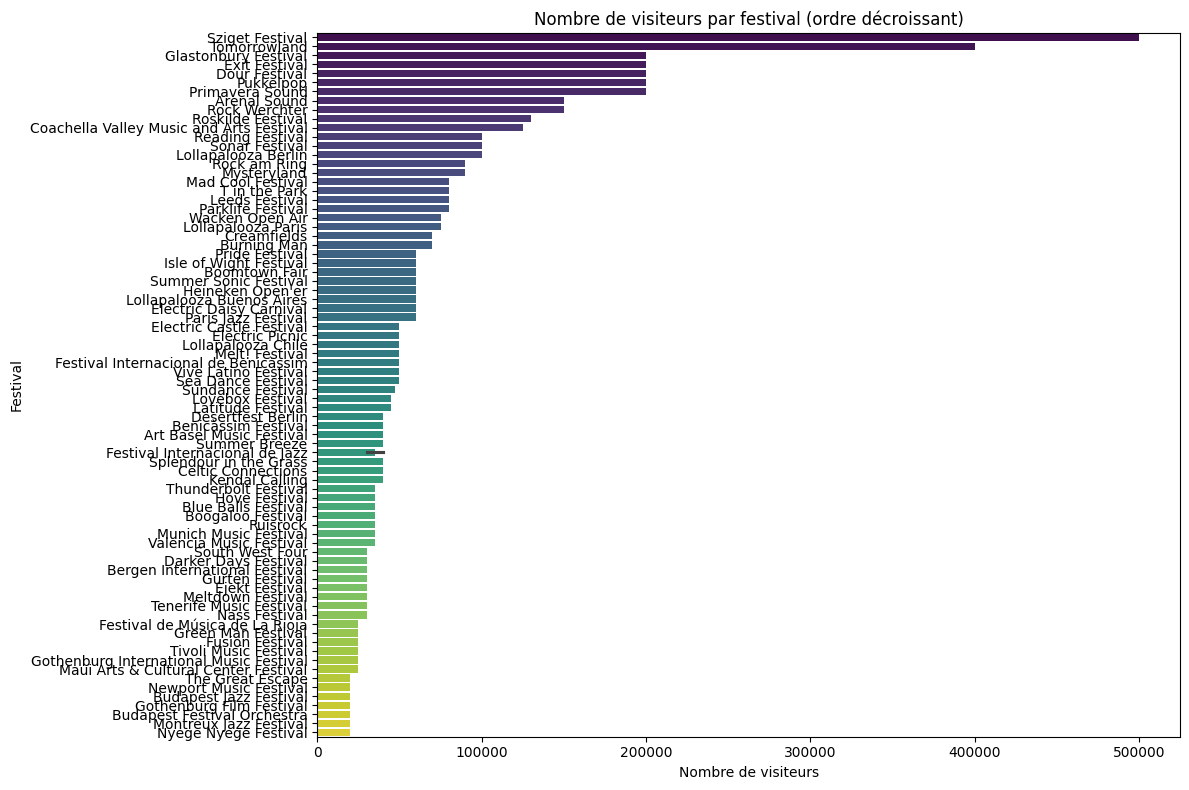

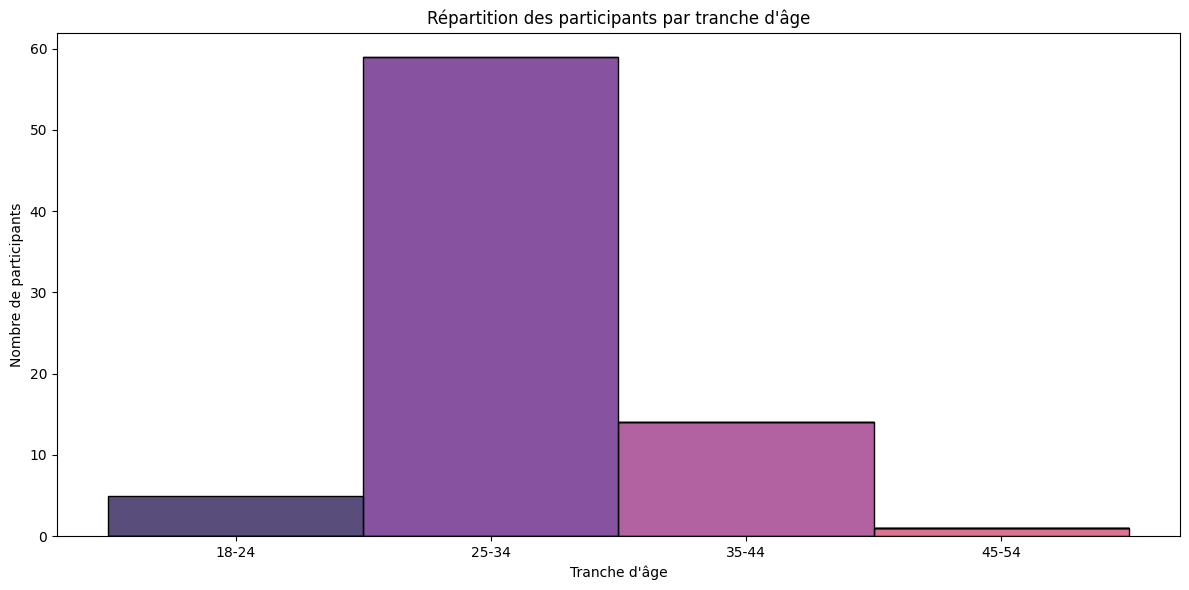

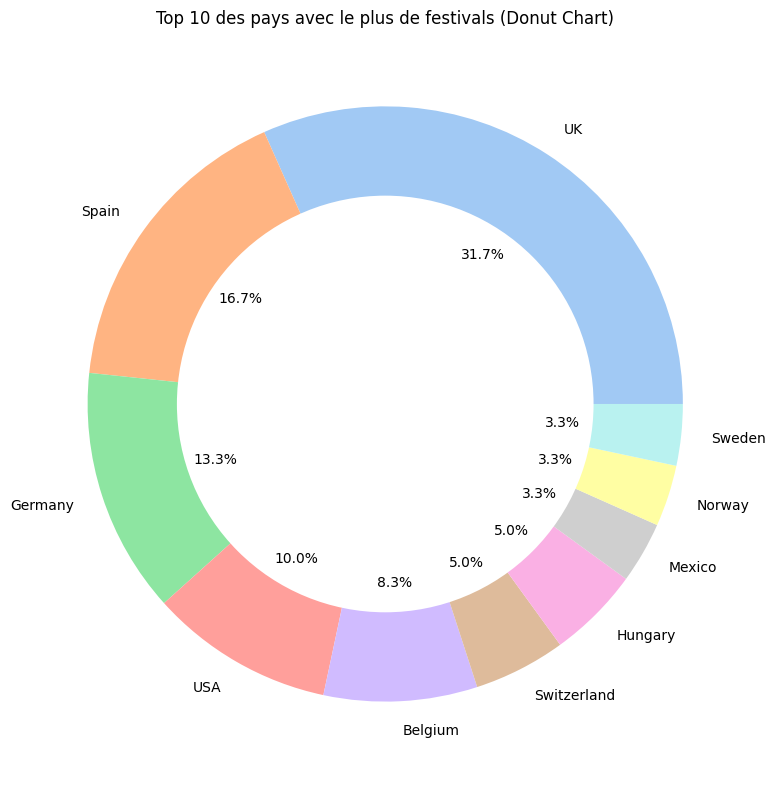

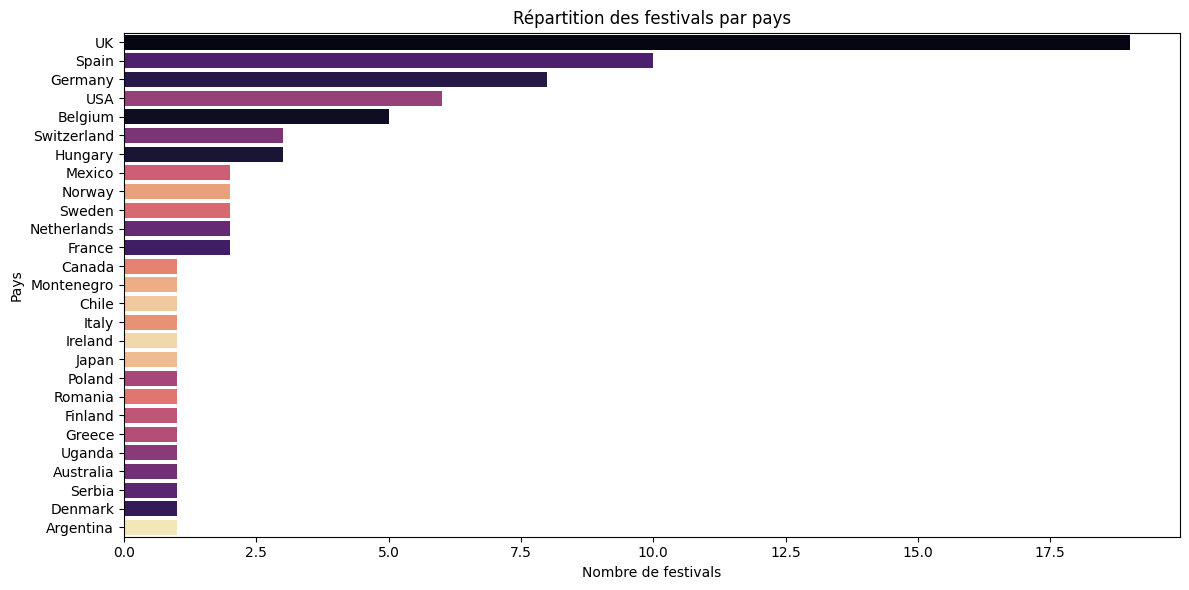

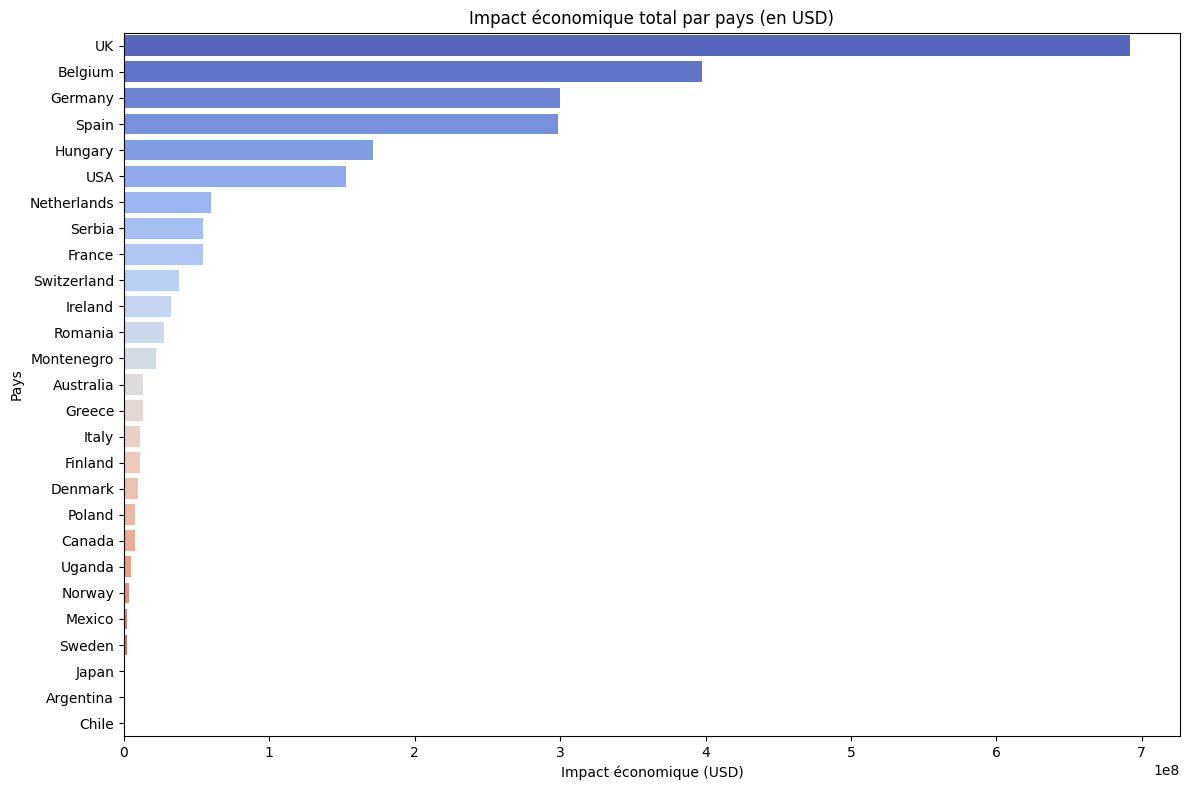

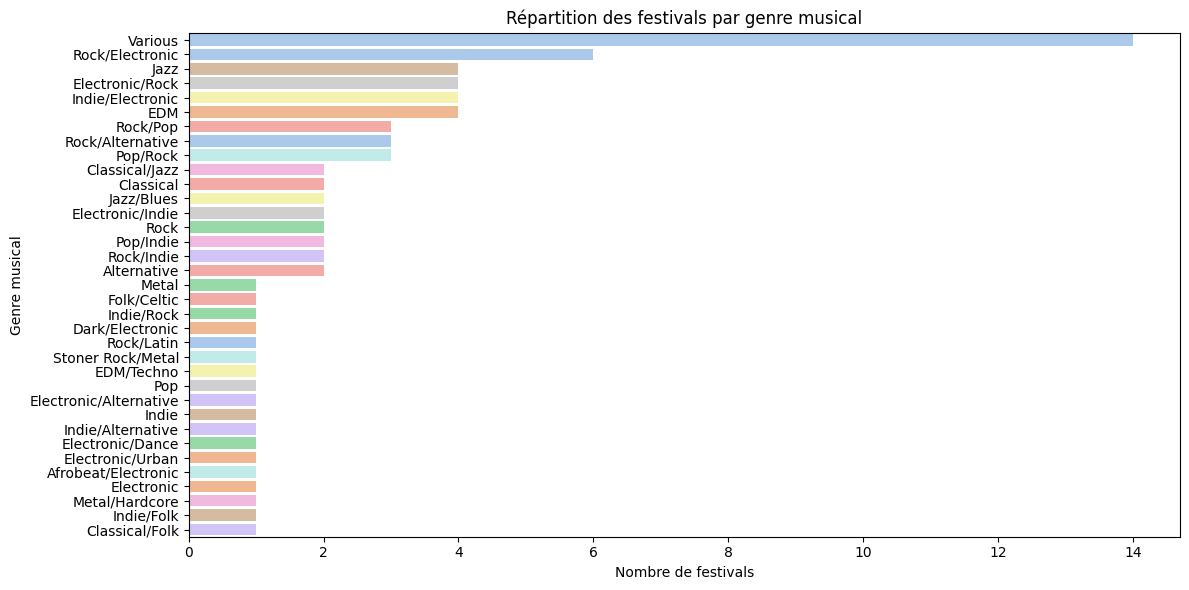

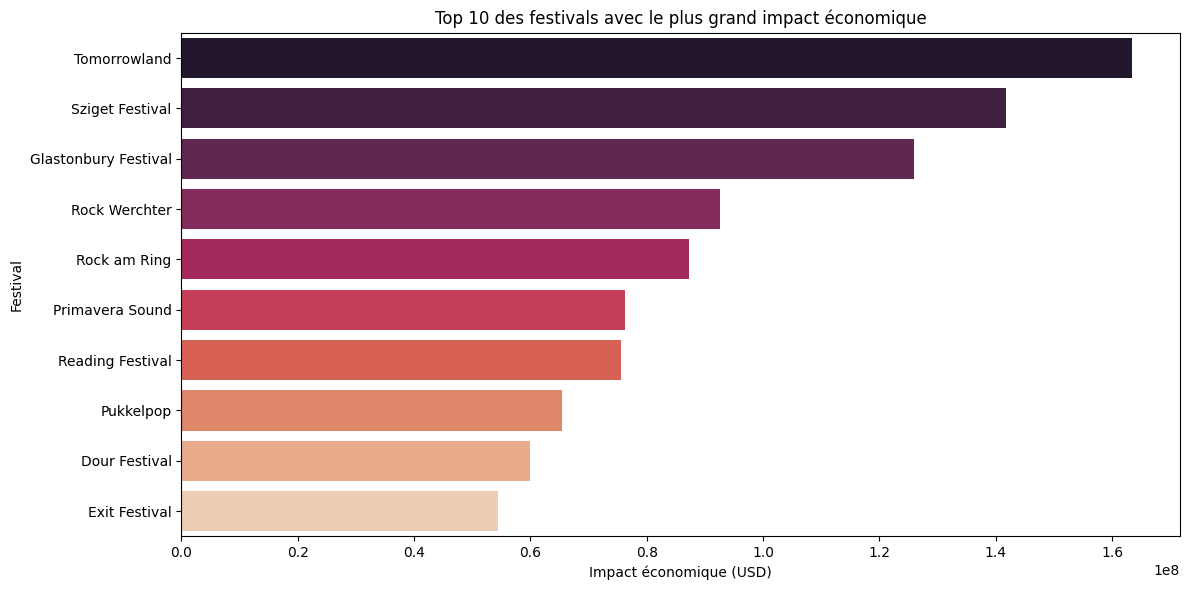

<function __main__.plot_kpis(df)>

In [23]:
def plot_kpis(df):
    # 1. Nombre de visiteurs par festival (ordre décroissant)
    plt.figure(figsize=(12, 8))
    df_sorted = df.sort_values(by="Attendance_Numbers", ascending=False)
    sns.barplot(
        x=df_sorted["Attendance_Numbers"], 
        y=df_sorted["Festival_Name"], 
        palette="viridis",
        hue=df_sorted["Festival_Name"],
        dodge=False,
        legend=False
    )
    plt.title("Nombre de visiteurs par festival (ordre décroissant)")
    plt.ylabel("Festival")
    plt.xlabel("Nombre de visiteurs")
    plt.tight_layout()
    plt.show()

    # 2. Répartition des participants par tranche d'âge
    plt.figure(figsize=(12, 6))
    age_order_natural = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
    df['Age_Category'] = pd.Categorical(df['Age_Category'], categories=age_order_natural, ordered=True)
    sns.histplot(
        df, x="Age_Category", 
        hue="Age_Category", 
        multiple="stack", 
        palette="magma", 
        legend=False,
        hue_order=age_order_natural
    )
    plt.title("Répartition des participants par tranche d'âge")
    plt.xlabel("Tranche d'âge")
    plt.ylabel("Nombre de participants")
    plt.tight_layout()
    plt.show()

    # 3. Top 10 des pays avec le plus de festivals (Donut Chart)
    plt.figure(figsize=(8, 8))
    top_countries = df["Country"].value_counts().nlargest(10)
    plt.pie(
        top_countries, 
        labels=top_countries.index, 
        autopct='%1.1f%%', 
        colors=sns.color_palette("pastel")
    )
    plt.title("Top 10 des pays avec le plus de festivals (Donut Chart)")
    centre_circle = plt.Circle((0,0),0.70,fc='white') 
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle) 
    plt.tight_layout()
    plt.show()

    # 4. Répartition des festivals par pays
    plt.figure(figsize=(12, 6))
    sns.countplot(
        y=df["Country"], 
        order=df["Country"].value_counts().index, 
        palette="magma", 
        hue=df["Country"],
        dodge=False,
        legend=False
    )
    plt.title("Répartition des festivals par pays")
    plt.ylabel("Pays")
    plt.xlabel("Nombre de festivals")
    plt.tight_layout()
    plt.show()

    # 5. Impact économique total par pays (en USD)
    plt.figure(figsize=(12, 8))
    economic_impact_per_country = df.groupby("Country")["Economic_Impact_USD"].sum().sort_values(ascending=False)
    sns.barplot(
        x=economic_impact_per_country.values, 
        y=economic_impact_per_country.index, 
        palette="coolwarm",
        hue=economic_impact_per_country.index,
        dodge=False,
        legend=False
    )
    plt.title("Impact économique total par pays (en USD)")
    plt.xlabel("Impact économique (USD)")
    plt.ylabel("Pays")
    plt.tight_layout()
    plt.show()

    # 6. Répartition des festivals par genre musical
    plt.figure(figsize=(12, 6))
    sns.countplot(
        y=df["Music_Genre"], 
        order=df["Music_Genre"].value_counts().index, 
        palette="pastel", 
        hue=df["Music_Genre"],
        dodge=False,
        legend=False
    )
    plt.title("Répartition des festivals par genre musical")
    plt.ylabel("Genre musical")
    plt.xlabel("Nombre de festivals")
    plt.tight_layout()
    plt.show()

    # 7. Top 10 des festivals avec le plus grand impact économique
    plt.figure(figsize=(12, 6))
    top_impact_festivals = df.nlargest(10, "Economic_Impact_USD")
    sns.barplot(
        x=top_impact_festivals["Economic_Impact_USD"], 
        y=top_impact_festivals["Festival_Name"], 
        palette="rocket",
        hue=top_impact_festivals["Festival_Name"],
        dodge=False,
        legend=False
    )
    plt.title("Top 10 des festivals avec le plus grand impact économique")
    plt.xlabel("Impact économique (USD)")
    plt.ylabel("Festival")
    plt.tight_layout()
    plt.show()

plot_kpis(df_filtered)
plot_kpis
